<a href="https://colab.research.google.com/github/Jordiekell/-BTECH--Machine_Learning_Course/blob/main/Witzel_DT_and_RF_Project_M4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 4: Decision Tree and Random Forest (Classification Problem) - Project

In this project, you will apply the Decision Tree and Random Forest models to a selected dataset in Python.


## **STEP 1: Pre-process the dataset**

In this step, we will do the following:

*   Import the necessary libraries
*   Load the dataset
*   Analyze the dataset
*   Summarize the dataset


We will work with Breast Cancer data. You can find the dataset in the online **UCI Machine Learning Repository**.

[Breast Cancer Wisconsin (Diagnostic) | UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)


**Data Description:**

This dataset contains 32 attributes and 569 observations. We want to predict the diagnosis: B = benign and M = malignant based on the attributes.


### **Import the libraries**

Here we will explore different libraries to apply the Decision Tree model

In [1]:
#Import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


### **Load the dataset**

The name of the dataset is `breast_cancer_data.csv`.

In [2]:
#Load the dataset
BC_data = pd.read_csv('/content/breast_cancer_data.csv')


In [3]:
#Display the dataset
BC_data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#Show a portion of the data
BC_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
BC_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


### **Analyze the data**

In [7]:
#Find the shape of data
BC_data.shape


(569, 33)

This shows that the data has 569 observations and 33 columns

In [8]:
#Show the information of the data
BC_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Show the null values in the data frame
BC_data.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


No Null except for "Unnamed: 32"

### **Summarize the data**

In [10]:
#Summarize the data and round it to 2 decimals
round(BC_data.describe(), 2)



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.0
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


### **Clean and prepare the dataset**

In this part, we will drop the `id` and `Unnamed: 32` variables since they are irrelevant.

In [11]:
#Drop the unnecessary variables for the analysis
BC_data.drop('id', axis=1, inplace=True)
BC_data.drop('Unnamed: 32', axis=1, inplace=True)


In [12]:
#Find the new shape
BC_data.shape


(569, 31)

In [13]:
#Get info of the data
BC_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [14]:
#Categories of Diagnosis
BC_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
#Change the diagnosis Malign for 1 and Benign for 0

BC_data['diagnosis'] = BC_data['diagnosis'].map({'M':1, 'B':0})

BC_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Visualize data**

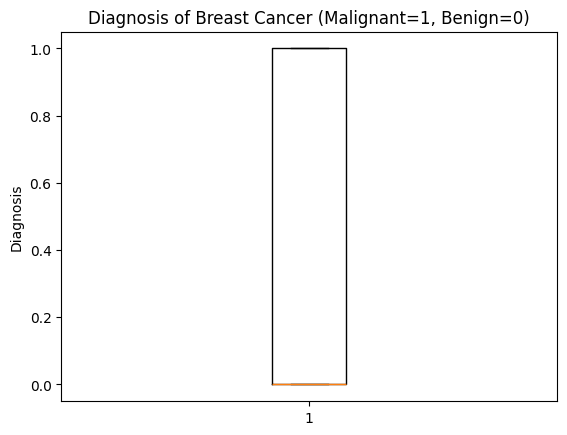

In [17]:
#Plot box and whisker plots
plt.boxplot(BC_data['diagnosis'])
plt.title("Diagnosis of Breast Cancer (Malignant=1, Benign=0)")
plt.ylabel("Diagnosis")
plt.show()

Text(0.5, 1.0, 'Diagnosis of Breast Cancer (Malignant=1, Benign=0)')

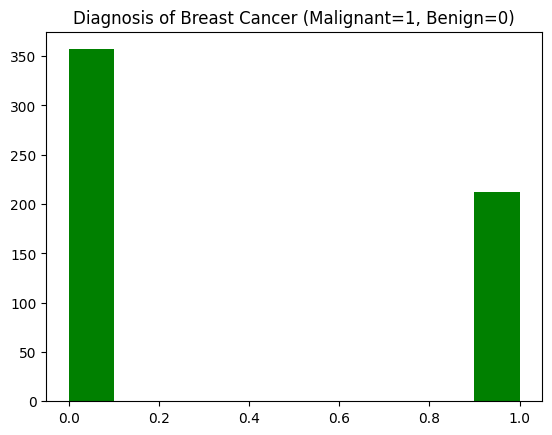

In [16]:
#Plot a histogram
plt.hist(BC_data['diagnosis'], color='green')
plt.title('Diagnosis of Breast Cancer (Malignant=1, Benign=0)')

## **STEP 2: Apply the Machine learning Model**:

Here we will apply the ML model:

*   Import the necessary libraries
*   Build the model
*   Display the results



### **Import the libraries**

In [18]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split


In [19]:
#Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

#Import for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [20]:
#Import for getting the metrics
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Split the data**

Split the data into training and data sets (training 70% and test 30%)

In [22]:
#First, we create the target and features variables
y = BC_data.loc[:, 'diagnosis'].values
X = BC_data.drop(['diagnosis'], axis=1).values


In [23]:
#Split the data into training 80% and test 20% set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [24]:
#Print the shape of the training and test data
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)



The shape of X_train is  (398, 30)
The shape of X_test is  (171, 30)
The shape of y_train is  (398,)
The shape of y_test is  (171,)


## **Build the model:**

We will build two models for this dataset: **Decision Tree and Random Forest** for classification problems

### **Decision Tree Model**

In [35]:
#We use Decision Tree for classification
DT = DecisionTreeClassifier(criterion = 'entropy', random_state=10)


In [36]:
#Fit the model for training
DT_model = DT.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

### **Random Forest Model**

In [37]:
#Use the Random Forest Model
RF = RandomForestClassifier(n_estimators=100, random_state=10)

RF.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [38]:
y_pred=RF.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

## **STEP 3: Evaluate the Machine learning Model**:

In this section, we will evaluate the model as follows:

*   Validate the performance of the built model
*   Use a performance metric



### **Decision Tree Model**

In [39]:
#Find the CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

print("The Confusion Matrix is:")
print(cm)

The Confusion Matrix is:
[[104   4]
 [  2  61]]


**Accuracy** = (TP+TN) / (TP+TN+FP+FN). Based on this confusion matrix, the accuracy is 96.4%!

(104+61) / (104+61+4+2)

**Preciscion** = TP / (TP+FP)

**Recall** = TP / (TP+FN)

**F1-Score** = (2 x Precsion x Recall) / (Precision + Recall)

In [30]:
#Use classification_report
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



**What is the accuracy?**
96%


### **Random Forest Model**

Now we use the Random Forest Model.

In [31]:
#Find the confusion matrix
confusion_matrix(y_test, y_pred)


array([[104,   4],
       [  2,  61]])

In [32]:
#Use classification_report
test_report=classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



**What is the accuracy?**
96%
